In [1]:
import os
import sys
import glob
import pandas as pd
import shutil
root_dir = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/derivatives/bundle_seg"

file_info = []

subs=glob.glob(os.path.join(root_dir, "sub-*"))
subs = [f.split("/")[-1] for f in subs]


for sub in subs:
    trk_files = glob.glob(os.path.join(root_dir, sub, 'tracto', "*.trk"))
    bundle_files = [f.split('bundle-')[-1].split('_desc')[0] for f in trk_files]

    file_info+= [{
        "sub": sub,
        "seg": bundle
    } for bundle in bundle_files]



root_dir = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/derivatives/mcm_tensors_staniz"

subs=glob.glob(os.path.join(root_dir, "sub-*"))
subs = [f.split("/")[-1] for f in subs]

for sub in subs:
    vtk_files = glob.glob(os.path.join(root_dir, sub, 'tracto', "*.vtk"))
    metric_files = glob.glob(os.path.join(root_dir, sub, 'tracto', "*.nii.gz"))
    bundle_files = [
        f.split('bundle-')[-1].split('_desc')[0] for f in vtk_files
    ]
    for bundle in bundle_files:
        metric_for_bundle = [
            f for f in metric_files if f"bundle-{bundle}_" in f
        ]
        n_metrics = len(metric_for_bundle)
        #Check if it was created after the 2025-05-26
        vtk_file = [f for f in vtk_files if f"bundle-{bundle}_" in f]
        after_date = False
        if vtk_file:
            vtk_file = vtk_file[0]
            if os.path.exists(vtk_file):
                # Check if file was modified after May 26, 2025 (timestamp 1737696000)
                after_date = os.path.getmtime(vtk_file) > 1749626232
            else:
                after_date = False

        bundle_info = {
            "sub": sub,
            "seg": bundle,
            "projection": bundle,
            "n_metrics": n_metrics,
            "after_date": after_date,
        }
        #Add the file path to bundle_info
        bundle_info['vtk_path'] = vtk_file
        file_info.append(bundle_info)

df= pd.DataFrame(file_info)

#Combine lines with same sub and seg
df = df.groupby(['sub', 'seg','after_date','vtk_path']).agg({
    'projection': lambda x: set(x),
    'n_metrics': 'sum'
}).reset_index()

#Return projection as a string or nan
# df['projection'] = df['projection'].apply(lambda x: list(x) if len(x) > 1 else list(x)[0] if len(x) == 1 else None)
#Sort projection list
df['projection'] = df['projection'].apply(lambda x: sorted([[i for i in x if isinstance(i, str)]][0]) if isinstance(x, set) else x)
df['projection'] = df['projection'].apply(lambda x: x[0] if len(x)>0 else None)
bad_files = df[df['after_date'] == False]
bad_files
#remove from system the vtk_path file of bad files
# for index, row in bad_files.iterrows():
#     vtk_path = row['vtk_path']
#     if os.path.exists(vtk_path):
#         print(f"Removing {vtk_path}")
#         os.remove(vtk_path)

,sub,seg,after_date,vtk_path,projection,n_metrics


In [2]:
import numpy as np
# Get unique subjects and use the bundle_names values for columns
bundle_names = {
    "ORright": "OR_right",
    "ICPleft": "ICP_left",
    "ILFleft": "ILF_left",
    "ILFright": "ILF_right",
    "SCPleft": "SCP_left",
    "CSTright": "CST_right",
    "CSTleft": "CST_left",
    "CC1": "CC_1",
    "ORleft": "OR_left",
    "SCPright": "SCP_right",
    "CC3": "CC_3",
    "FPTleft": "FPT_left",
    "FPTright": "FPT_right",
    "IFOleft": "IFO_left",
    "POPTright": "POPT_right",
    "POPTleft": "POPT_left",
    "ATRleft": "ATR_left",
    "ATRright": "ATR_right",
    "IFOright": "IFO_right",
    "SLFIIIleft": "SLF_III_left",
    "STRleft": "STR_left",
    "CC7": "CC_7",
    "STRright": "STR_right",
    "CC6": "CC_6",
    "STFOleft": "ST_FO_left",
    "CC5": "CC_5",
    "SLFIleft": "SLF_I_left",
    "SLFIIIright": "SLF_III_right",
    "CC4": "CC_4",
    "SLFIright": "SLF_I_right",
    "STFOright": "ST_FO_right",
    "SLFIIright": "SLF_II_right",
    "MLFright": "MLF_right",
    "SLFIIleft": "SLF_II_left",
    "MCP": "MCP",
    "MLFleft": "MLF_left",
    "STOCCleft": "ST_OCC_left",
    "CGleft": "CG_left",
    "STPREMleft": "ST_PREM_left",
    "STOCCright": "ST_OCC_right",
    "CGright": "CG_right",
    "STPREMright": "ST_PREM_right",
    "CC2": "CC_2",
    "STPOSTCright": "ST_POSTC_right",
    "AFright": "AF_right",
    "STPOSTCleft": "ST_POSTC_left",
    "TOCCright": "T_OCC_right",
    "STPRECright": "ST_PREC_right",
    "STPRECleft": "ST_PREC_left",
    "TOCCleft": "T_OCC_left",
    "TPOSTCright": "T_POSTC_right",
    "AFleft": "AF_left",
    "TPOSTCleft": "T_POSTC_left",
    "STPARright": "ST_PAR_right",
    "TPREMleft": "T_PREM_left",
    "TPREMright": "T_PREM_right",
    "TPRECright": "T_PREC_right",
    "TPARright": "T_PAR_right",
    "STPREFright": "ST_PREF_right",
    "STPREFleft": "ST_PREF_left",
    "TPREFright": "T_PREF_right",
    "FXright": "FX_right",
    "FXleft": "FX_left",
    "CA": "CA",
    "ICPright": "ICP_right",
    "STPARleft": "ST_PAR_left",
    "TPRECleft": "T_PREC_left",
    "UFleft": "UF_left",
    "UFright": "UF_right",
    "TPARleft": "T_PAR_left",
    "TPREFleft": "T_PREF_left"
    }

available_bundles = [
    'AF_left', 'AF_right', 'ATR_left', 'ATR_right', 'CC_1', 'CC_2', 'CC_3',
    'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CG_left', 'CG_right', 'CST_left',
    'CST_right', 'FPT_left', 'FPT_right', 'ICP_left', 'ICP_right',
    'IFO_left', 'IFO_right', 'ILF_left', 'ILF_right', 'MCP', 'OR_left',
    'OR_right', 'POPT_left', 'POPT_right', 'SCP_left', 'SCP_right',
    'SLF_I_left', 'SLF_I_right', 'SLF_II_left', 'SLF_II_right',
    'SLF_III_left', 'SLF_III_right', 'STR_left', 'STR_right', 'UF_left',
    'UF_right', 'T_PREM_left', 'T_PREM_right', 'T_PAR_left', 'T_PAR_right',
    'T_OCC_left', 'T_OCC_right', 'ST_FO_left', 'ST_FO_right',
    'ST_PREM_left', 'ST_PREM_right'
]
# Get unique subjects
unique_subs = df['sub'].unique().tolist()
# Sort the bundle names alphabetically
bundle_columns = sorted(list(bundle_names.values()))

# Create an empty matrix filled with 0 (default: bundle doesn't exist)
matrix = {}
for sub in unique_subs:
    matrix[sub] = {}
    for bundle in bundle_columns:
        matrix[sub][bundle] = 0  # Default: bundle doesn't exist

# Fill the matrix based on df data
for i in range(len(df)):
    row = df.iloc[i]
    sub = row['sub']
    seg = row['seg']
    n_metrics = row['n_metrics']

    # Check if this seg exists in bundle_names
    if seg in bundle_names:
        bundle_name = bundle_names[seg]

    if n_metrics == 0:
        matrix[sub][bundle_name] = 1  # Bundle exists but n_metrics = 0
    elif 0 < n_metrics < 6:
        matrix[sub][bundle_name] = 2  # Bundle exists with 0 < n_metrics < 6
    elif n_metrics == 6:
        matrix[sub][bundle_name] = 3  # Bundle exists with n_metrics = 6

# Convert to pandas DataFrame for better visualization
matrix_rows = []
for sub in unique_subs:
    row = {'sub': sub}
    for bundle in bundle_columns:
        row[bundle] = matrix[sub][bundle]
    matrix_rows.append(row)

matrix_df = pd.DataFrame(matrix_rows)
matrix_df.set_index('sub', inplace=True)
#Drop columns that are not in available_bundles
# matrix_df = matrix_df[matrix_df.columns.intersection(available_bundles)]
matrix_df

,AF_left,AF_right,ATR_left,ATR_right,CA,CC_1,CC_2,CC_3,CC_4,CC_5,...,T_POSTC_left,T_POSTC_right,T_PREC_left,T_PREC_right,T_PREF_left,T_PREF_right,T_PREM_left,T_PREM_right,UF_left,UF_right
sub,,,,,,,,,,,,,,,,,,,,,
sub-01001,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01002,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01006,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01007,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01008,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01009,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01010,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01012,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
sub-01013,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


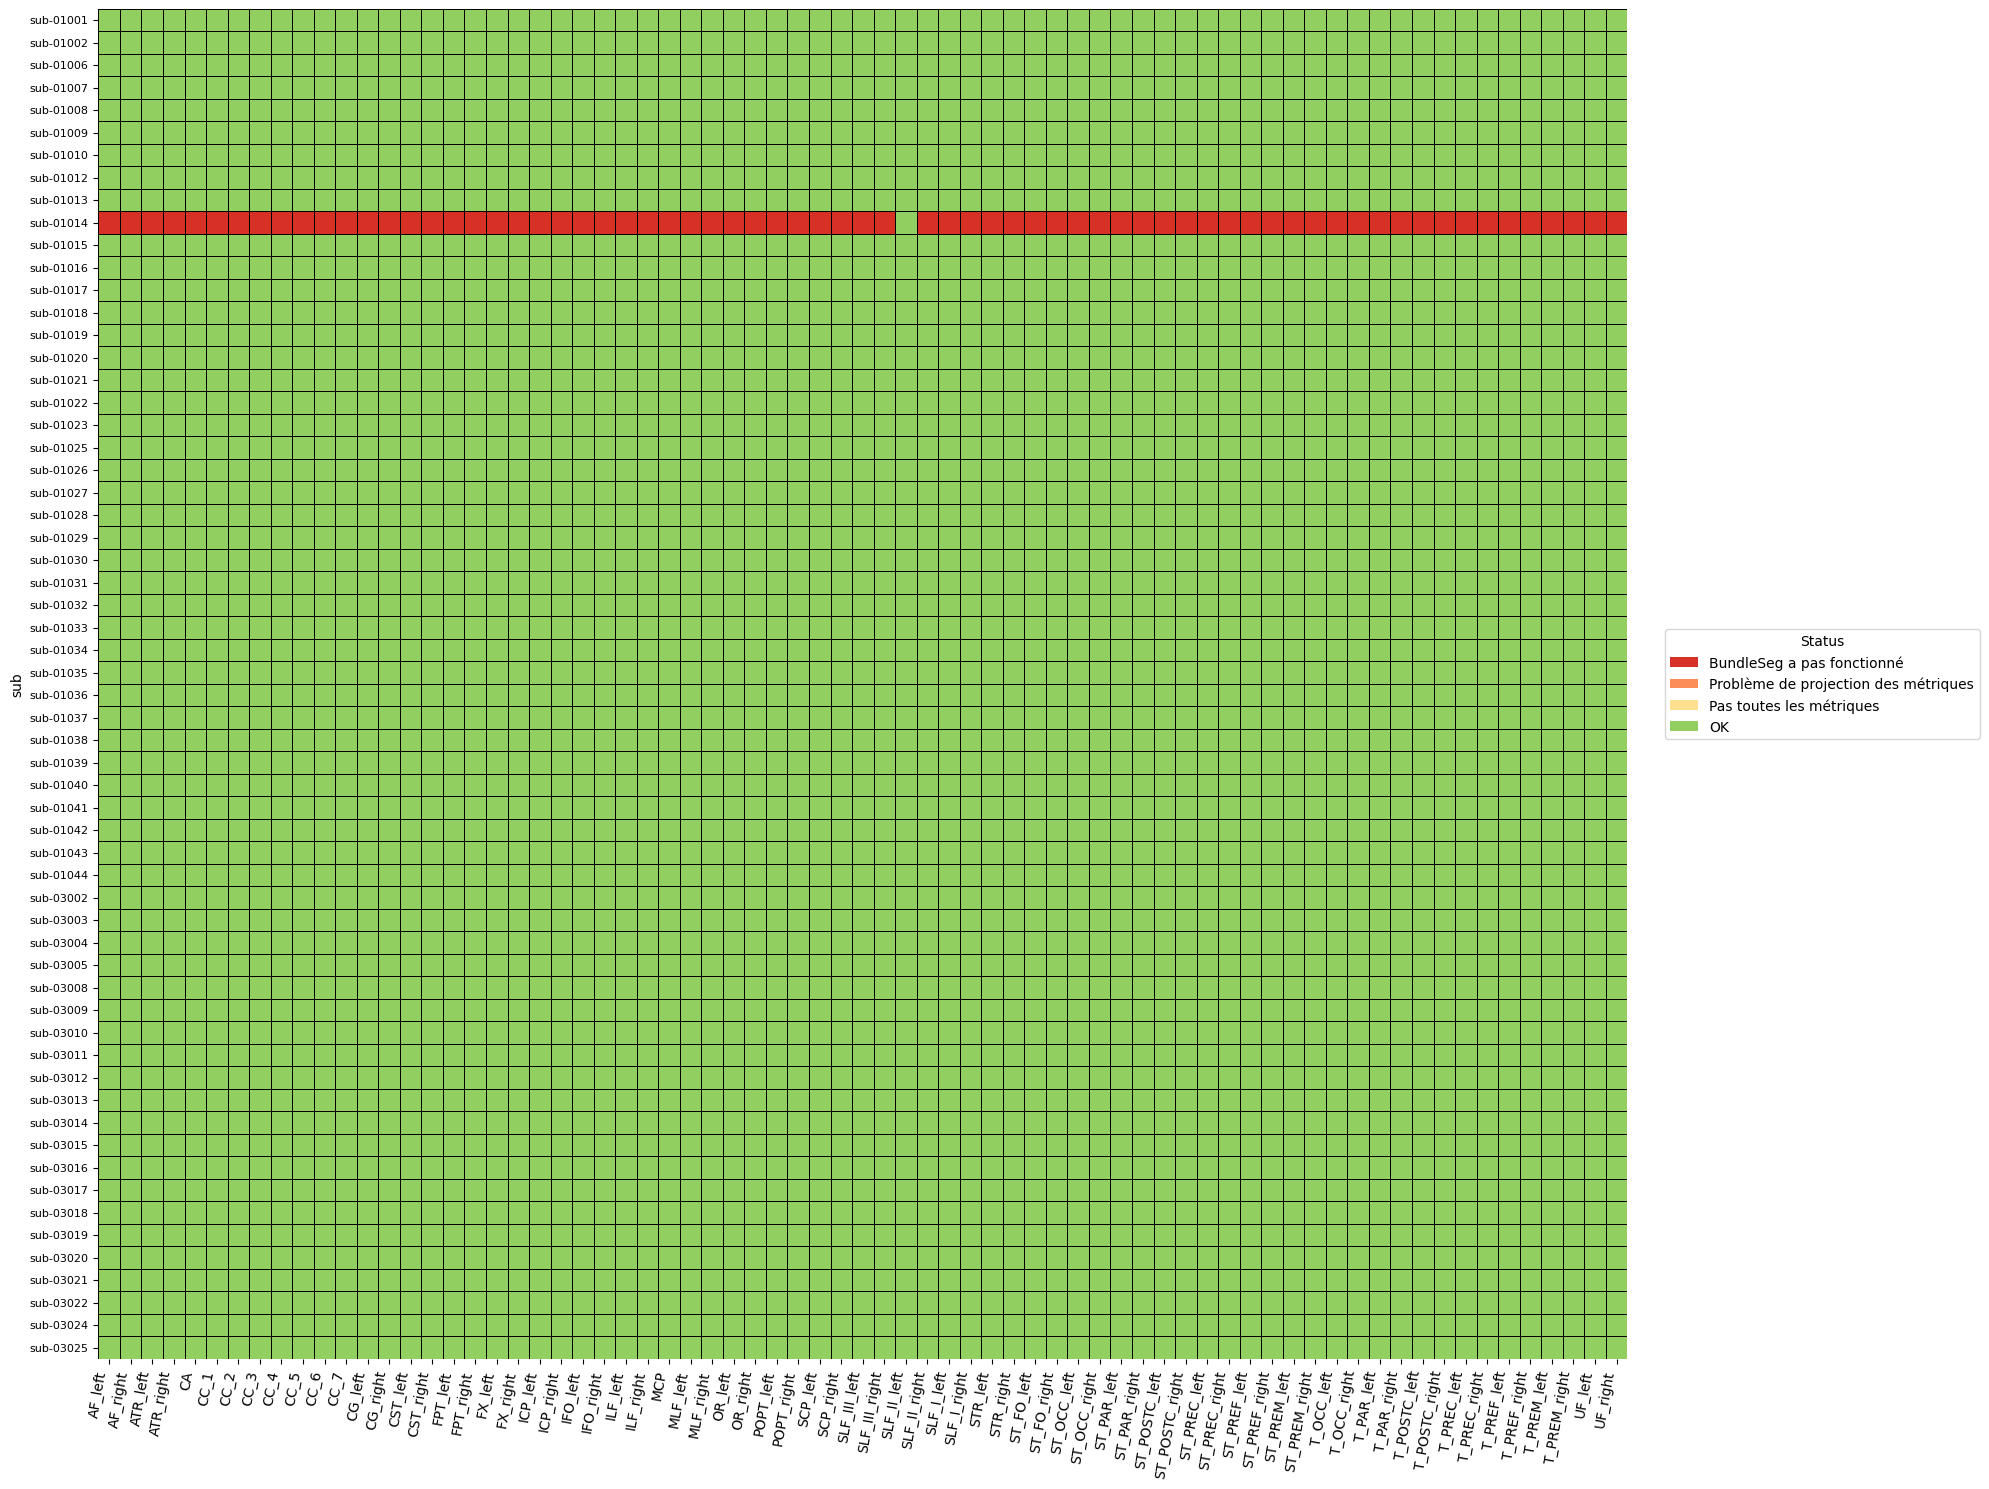

In [3]:
#Save as image with categorical colors (0: missing, 1: exists with n_metrics=0, 2: partial metrics, 3: complete metrics)
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Define categorical colors (red, orange, yellow, green)
cmap = colors.ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91cf60'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Create figure with adjusted dimensions
plt.figure(figsize=(20, 15))
ax = plt.gca()

# Create the heatmap
sns.heatmap(matrix_df, annot=False, cmap=cmap, norm=norm, cbar=False, 
            linewidths=0.5, linecolor='black', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80, ha='right')

# Ensure all subject labels are shown
plt.yticks(ticks=np.arange(len(unique_subs)) + 0.5, labels=unique_subs, fontsize=8)

# plt.title('Bundle Segmentation Status Matrix')

# Create a separate legend instead of a colorbar
legend_elements = [
    Patch(facecolor='#d73027', label='BundleSeg a pas fonctionné'),
    Patch(facecolor='#fc8d59', label='Problème de projection des métriques'),
    Patch(facecolor='#fee090', label='Pas toutes les métriques'),
    Patch(facecolor='#91cf60', label='OK')
]

# Add legend outside the plot
plt.legend(handles=legend_elements, loc='center left', 
           bbox_to_anchor=(1.02, 0.5), title="Status")

plt.tight_layout()
plt.savefig('bundle_segmentation_matrix.pdf', bbox_inches='tight', dpi=300)

In [4]:
#Read /home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/participants.tsv 
participants_file = "/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/participants.tsv"
participants_df = pd.read_csv(participants_file, sep='\t')
# Merge with participants_df to get 'group' info
merged_df = matrix_df.merge(participants_df[['participant_id', 'group']], 
                             left_index=True, right_on='participant_id', how='left')

#Get the full database 
full_db='/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/participants_full_info.xlsx'
full_db_df = pd.read_excel(full_db)

# Merge the age and sex information from full_db_df
participants_df = participants_df.merge(full_db_df[['participant_id', 'age','sex']],
                                         on='participant_id', how='left')

participants_df['sex']= participants_df['sex'].apply(lambda x: 0 if str(x).lower() == 'm' else 1 if str(x).lower() == 'f' else None)
participants_df=participants_df.dropna()
participants_df['site']= participants_df['site'].apply(lambda x: 1 if x=='Rennes' else 0)
participants_df

,participant_id,group,site,age,sex
1,sub-01002,patient,1,73.0,1.0
2,sub-01006,patient,1,66.0,0.0
3,sub-01007,patient,1,72.0,1.0
4,sub-01009,patient,1,80.0,1.0
5,sub-01012,patient,1,74.0,1.0
...,...,...,...,...,...
61,sub-03018,control,0,64.0,1.0
62,sub-03019,control,0,83.0,1.0
63,sub-03020,control,0,77.0,1.0
64,sub-03025,control,0,76.0,1.0


Remaining subjects after filtering: 59 out of 60


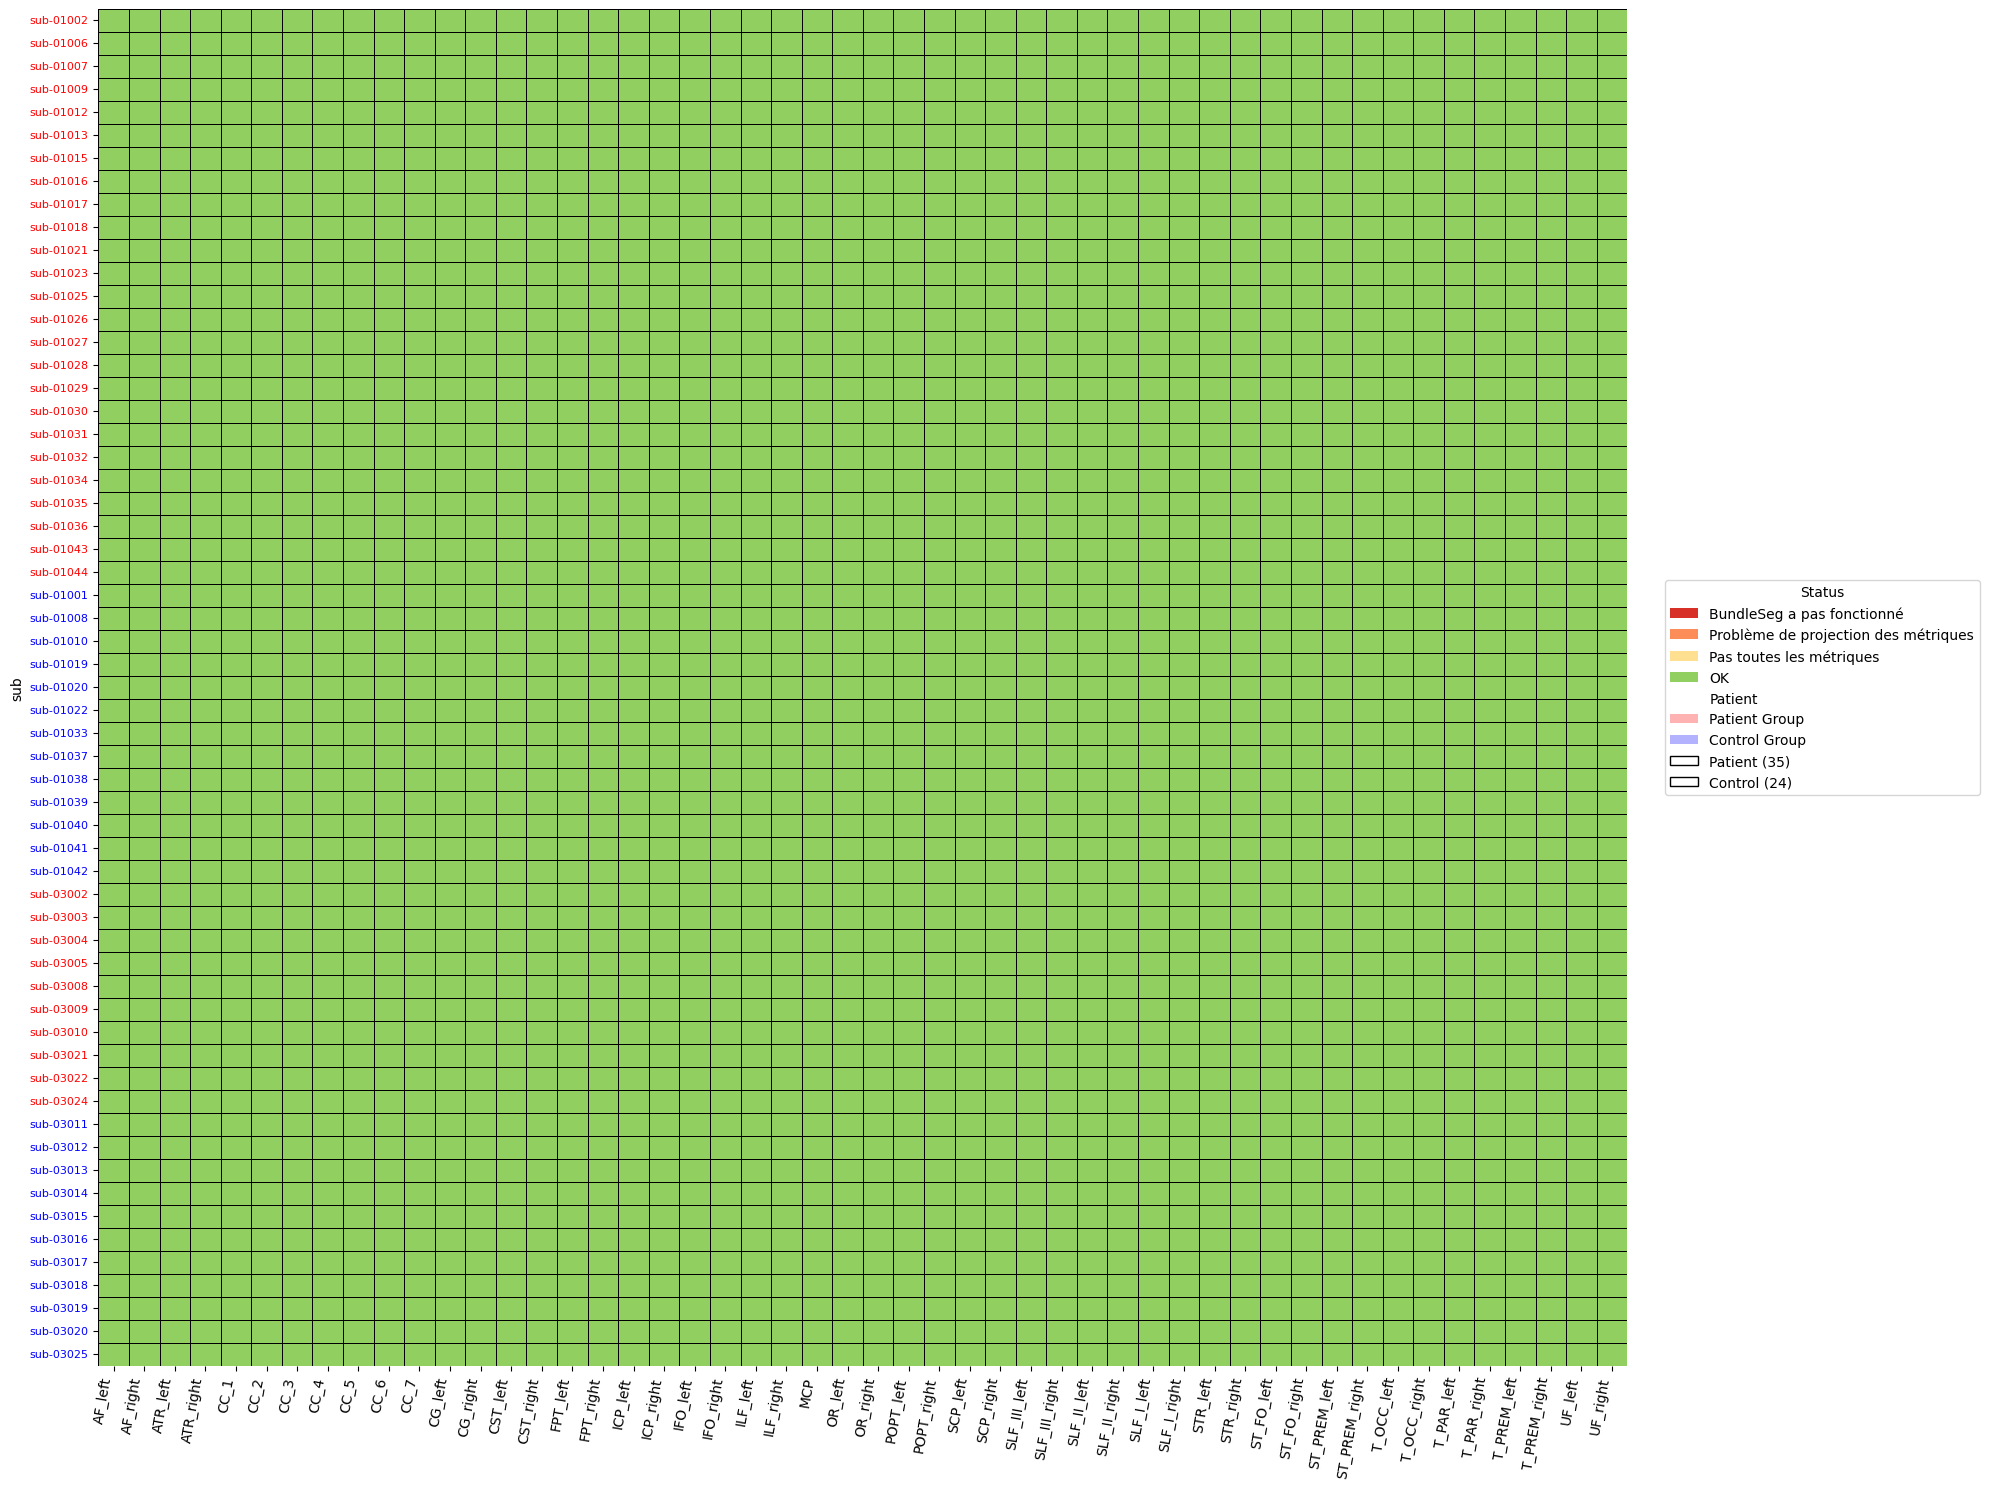

In [5]:
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.colors as colors
filtered_df = matrix_df.copy()
#If a bundle as less than 50% of subjects with n_metrics = 6, remove it
#Drop columns that are not in available_bundles
available_bundles = [
    'AF_left', 'AF_right', 'ATR_left', 'ATR_right', 'CC_1', 'CC_2', 'CC_3',
    'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CG_left', 'CG_right', 'CST_left',
    'CST_right', 'FPT_left', 'FPT_right', 'ICP_left', 'ICP_right',
    'IFO_left', 'IFO_right', 'ILF_left', 'ILF_right', 'MCP', 'OR_left',
    'OR_right', 'POPT_left', 'POPT_right', 'SCP_left', 'SCP_right',
    'SLF_I_left', 'SLF_I_right', 'SLF_II_left', 'SLF_II_right',
    'SLF_III_left', 'SLF_III_right', 'STR_left', 'STR_right', 'UF_left',
    'UF_right', 'T_PREM_left', 'T_PREM_right', 'T_PAR_left', 'T_PAR_right',
    'T_OCC_left', 'T_OCC_right', 'ST_FO_left', 'ST_FO_right',
    'ST_PREM_left', 'ST_PREM_right'
]

filtered_df = filtered_df[filtered_df.columns.intersection(available_bundles)]

for bundle in filtered_df.columns:
    if (filtered_df[bundle] == 3).sum() < 0.8*len(filtered_df):
        filtered_df.drop(columns=[bundle], inplace=True)

#Now drop subjects with non OK bundles
# Get the list of subjects that have complete data (value 3) for all remaining bundles
subjects_with_complete_data = filtered_df[filtered_df.eq(3).all(axis=1)].index.tolist()

# Keep only those subjects in the filtered DataFrame
filtered_df = filtered_df.loc[subjects_with_complete_data]

#Drop those subjects from participants_df that has nan in group, age or sex
filtered_participants = participants_df[participants_df['participant_id'].isin(filtered_df.index)]
filtered_participants = filtered_participants.dropna(subset=['group','age','sex'])
# Update the filtered DataFrame index to match the filtered participants
filtered_df = filtered_df.loc[filtered_participants['participant_id']]

# Print number of subjects remaining
print(f"Remaining subjects after filtering: {len(filtered_df)} out of {len(unique_subs)}")
# Print the filtered DataFrame
# Define categorical colors (red, orange, yellow, green)
cmap = colors.ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91cf60'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Create figure with adjusted dimensions
plt.figure(figsize=(20, 15))
ax = plt.gca()

# Create the heatmap
sns.heatmap(filtered_df, annot=False, cmap=cmap, norm=norm, cbar=False, 
            linewidths=0.5, linecolor='black', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80, ha='right')

unique_filtered_subs = filtered_df.index.unique().tolist()

# Ensure all subject labels are shown
plt.yticks(ticks=np.arange(len(unique_filtered_subs)) + 0.5, labels=unique_filtered_subs, fontsize=8)

# Add color coding for groups in y-axis labels
# Merge with participants_df to get group info
filtered_with_group = pd.merge(
    pd.DataFrame(index=unique_filtered_subs), 
    participants_df[['participant_id', 'group','age','sex','site']], 
    left_index=True, right_on='participant_id', 
    how='left'
)

#Drop if it contains NaN 
filtered_with_group = filtered_with_group.dropna()

# Color the y-axis labels based on group
for i, (idx, row) in enumerate(filtered_with_group.iterrows()):
    if row['group'] == 'patient':
        ax.get_yticklabels()[i].set_color('red')
    else:  # control
        ax.get_yticklabels()[i].set_color('blue')

# Create a separate legend instead of a colorbar
legend_elements = [
    Patch(facecolor='#d73027', label='BundleSeg a pas fonctionné'),
    Patch(facecolor='#fc8d59', label='Problème de projection des métriques'),
    Patch(facecolor='#fee090', label='Pas toutes les métriques'),
    Patch(facecolor='#91cf60', label='OK'),
    Patch(facecolor='white', edgecolor='black', label='Patient', alpha=0.0),
    Patch(facecolor='red', label='Patient Group', alpha=0.3),
    Patch(facecolor='blue', label='Control Group', alpha=0.3)
]

#In legend, add the count for each unique group value
group_counts = filtered_with_group['group'].value_counts()
for group, count in group_counts.items():
    legend_elements.append(Patch(facecolor='none', edgecolor='black', 
                                 label=f'{group.capitalize()} ({count})'))
    

# Add legend outside the plot
plt.legend(handles=legend_elements, loc='center left', 
           bbox_to_anchor=(1.02, 0.5), title="Status")

plt.tight_layout()
plt.savefig('bundle_segmentation_matrix_filtered.pdf', bbox_inches='tight', dpi=300)

In [7]:
# Get the remaining bundles after filtering
remaining_bundles = filtered_df.columns.tolist()

# Create a space-separated string of bundle names
bundle_str = ' '.join(remaining_bundles)

# Create the content for subjects.txt
with open('subjects.txt', 'w') as f:
    # Write header lines
    f.write(f"# tractometry_path=TEMPDIR/SUBJECT_ID/Tractometry.csv\n")
    f.write(f"# bundles={bundle_str}\n")
    #Get the first subject from the filtered DataFrame
    first_subject = unique_filtered_subs[0]
    f.write(f"# plot_3D=TEMPDIR/{first_subject}/tracto/\n")
    
    # Write the column headers
    f.write("subject_id group age sex site\n")
    #f.write("subject_id group\n")

    # Merge with participants_df to get group info for the filtered subjects
    for subject in unique_filtered_subs:
        # Find the group for this subject
        subject_info = participants_df[participants_df['participant_id'] == subject]
        if not subject_info.empty:
            group_val = 1 if subject_info['group'].values[0] == 'patient' else 0
            
            # Get age and sex for this subject
            age = subject_info['age'].values[0] if not pd.isna(subject_info['age'].values[0]) else "NA"
            sex = subject_info['sex'].values[0] if not pd.isna(subject_info['sex'].values[0]) else "NA"
            site = subject_info['site'].values[0] if not pd.isna(subject_info['site'].values[0]) else "NA"
            
            # Write subject, group, age, and sex to the file
            f.write(f"{subject} {group_val} {age} {sex} {site}\n")
            # f.write(f"{subject} {group_val}\n")



print("File 'subjects.txt' has been created with the appropriate format.")

File 'subjects.txt' has been created with the appropriate format.


In [ ]:
#Version all

# Get the remaining bundles after filtering
remaining_bundles = filtered_df.columns.tolist()

# Create a space-separated string of bundle names
bundle_str = ' '.join(remaining_bundles)

# Create the content for subjects.txt
with open('subjects_all.txt', 'w') as f:
    # Write header lines
    f.write(f"# tractometry_path=TEMPDIR/SUBJECT_ID/Tractometry.csv\n")
    #Get the first subject from the filtered DataFrame
    
    # Write the column headers
    f.write("subject_id group\n")
    
    # Merge with participants_df to get group info for the filtered subjects
    for subject in unique_subs:
        # Find the group for this subject
        subject_info = participants_df[participants_df['participant_id'] == subject]
        if not subject_info.empty:
            group_val = 1 if subject_info['group'].values[0] == 'patient' else 0
            f.write(f"{subject} {group_val}\n")

print("File 'subjects_all.txt' has been created with the appropriate format.")

File 'subjects_all.txt' has been created with the appropriate format.


In [14]:
from actiDep.data.loader import Actidep
import pandas as pd

ds = Actidep("/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids")

assoc = ds.get_global(pipeline="hcp_association_multiclusters_frechetlong_50pts",datatype='metric')
df = pd.concat([f.df for f in assoc])


In [15]:
df.groupby('subject').count()

,datatype,pipeline,derivative,extension,suffix,desc,model,bundle,clustering,path,age,label,algo
subject,,,,,,,,,,,,,
01001,71,71,71,71,71,71,71,71,71,71,71,0,0
01002,71,71,71,71,71,71,71,71,71,71,71,0,0
01006,71,71,71,71,71,71,71,71,71,71,71,0,0
01007,71,71,71,71,71,71,71,71,71,71,71,0,0
01008,71,71,71,71,71,71,71,71,71,71,71,1,1
01009,71,71,71,71,71,71,71,71,71,71,71,0,0
01010,71,71,71,71,71,71,71,71,71,71,71,0,0
01012,71,71,71,71,71,71,71,71,71,71,71,0,0
01013,71,71,71,71,71,71,71,71,71,71,71,0,0


,subject,datatype,pipeline,derivative,extension,suffix,desc,model,bundle,clustering,path,age,label,algo
0,01034,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,cleaned,MCM,AFleft,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759933e+09,NaN,NaN
0,01034,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,cleaned,MCM,AFright,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759933e+09,NaN,NaN
0,01034,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,cleaned,MCM,ATRleft,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759933e+09,NaN,NaN
0,01034,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,cleaned,MCM,ATRright,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759933e+09,NaN,NaN
0,01034,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,cleaned,MCM,CA,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759933e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,03025,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,normalized,MCM,TPREFright,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759995e+09,brain,ifod2
0,03025,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,normalized,MCM,TPREMleft,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759995e+09,brain,ifod2
0,03025,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,normalized,MCM,TPREMright,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759995e+09,brain,ifod2
0,03025,metric,hcp_association_multiclusters_frechetlong_50pts,True,.csv,mean,normalized,MCM,UFleft,frechetlong,/home/ndecaux/NAS_EMPENN/share/projects/actide...,1.759995e+09,brain,ifod2
